# RDD implementation

#### Unziping the files

In [0]:
# Copying the zip files to the /tmp directory
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")

True

In [0]:
%sh
# Unzipping the files using unix command
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
%sh
# Checking the unzipped file in the /tmp directory
ls /tmp/

Rserv
RtmpnM10cs
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.csv
clinicaltrial_2020.zip
clinicaltrial_2021.csv
clinicaltrial_2021.zip
clinicaltrial_2023.csv
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.csv
pharma.zip
python_lsp_logs
systemd-private-726b930544834943bb8bea0be9abd976-systemd-logind.service-tBEfPc
systemd-private-726b930544834943bb8bea0be9abd976-systemd-resolved.service-jhDTmR
tmp.sg7W6unAoK


In [0]:
# Moving the csv files to /FileStore/tables/ directory
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "/FileStore/tables/", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "/FileStore/tables/", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "/FileStore/tables/", True)
dbutils.fs.mv("file:/tmp/pharma.csv", "/FileStore/tables/", True)

True

In [0]:
# Confirming if all the files are in DBFS
display(dbutils.fs.ls("/FileStore/tables/"))

path name size modificationTime dbfs:/FileStore/tables/Occupancy_Detection_Data.csv Occupancy_Detection_Data.csv 50968 1709376212000 dbfs:/FileStore/tables/account-models/ account-models/ 0 0 dbfs:/FileStore/tables/account-modelss/ account-modelss/ 0 0 dbfs:/FileStore/tables/accounts/ accounts/ 0 0 dbfs:/FileStore/tables/activations/ activations/ 0 0 dbfs:/FileStore/tables/activations.zip activations.zip 8411369 1706707977000 dbfs:/FileStore/tables/clinicaltrial_2020/ clinicaltrial_2020/ 0 0 dbfs:/FileStore/tables/clinicaltrial_2020.csv clinicaltrial_2020.csv 46318151 1714597764000 dbfs:/FileStore/tables/clinicaltrial_2020.zip clinicaltrial_2020.zip 10599182 1711757416000 dbfs:/FileStore/tables/clinicaltrial_2021/ clinicaltrial_2021/ 0 0 dbfs:/FileStore/tables/clinicaltrial_2021.csv clinicaltrial_2021.csv 50359696 1714597761000 dbfs:/FileStore/tables/clinicaltrial_2021.zip clinicaltrial_2021.zip 11508457 1711757435000 dbfs:/FileStore/tables/clinicaltrial_2023/ clinicaltrial_2023/ 0 0 dbfs:/FileStore/tables/clinicaltrial_2023.csv clinicaltrial_2023.csv 292436366 1714597754000 dbfs:/FileStore/tables/clinicaltrial_2023.zip clinicaltrial_2023.zip 57166668 1711734400000 dbfs:/FileStore/tables/flood-1.csv flood-1.csv 128984 1709311870000 dbfs:/FileStore/tables/flood-1.zip flood-1.zip 52053 1709311735000 dbfs:/FileStore/tables/flood-2.csv flood-2.csv 128984 1709312989000 dbfs:/FileStore/tables/flood-3.csv flood-3.csv 128984 1709313006000 dbfs:/FileStore/tables/flood-4.csv flood-4.csv 128984 1709313710000 dbfs:/FileStore/tables/flood-5.csv flood-5.csv 128984 1709313980000 dbfs:/FileStore/tables/flood.csv flood.csv 128984 1709311836000 dbfs:/FileStore/tables/flood.zip flood.zip 52053 1709311716000 dbfs:/FileStore/tables/iotstream/ iotstream/ 0 0 dbfs:/FileStore/tables/iotstream.zip iotstream.zip 43891 1709329615000 dbfs:/FileStore/tables/logs/ logs/ 0 0 dbfs:/FileStore/tables/logs.zip logs.zip 18168065 1707239916000 dbfs:/FileStore/tables/movies.csv movies.csv 494431 1709733056000 dbfs:/FileStore/tables/myratings.csv myratings.csv 10683 1709733132000 dbfs:/FileStore/tables/pharma/ pharma/ 0 0 dbfs:/FileStore/tables/pharma.csv pharma.csv 678999 1714597765000 dbfs:/FileStore/tables/pharma.zip pharma.zip 109982 1711734407000 dbfs:/FileStore/tables/ratings.csv ratings.csv 2483723 1709733070000 dbfs:/FileStore/tables/steam_200k.csv steam_200k.csv 8059447 1712647943000 dbfs:/FileStore/tables/test-1.json test-1.json 17958 1707217184000 dbfs:/FileStore/tables/test.json test.json 17958 1707069750000 dbfs:/FileStore/tables/webpage/ webpage/ 0 0 dbfs:/FileStore/tables/webpage.zip webpage.zip 1582 1708859576000 dbfs:/FileStore/tables/webpage_files_all/ webpage_files_all/ 0 0 dbfs:/FileStore/tables/webpage_files_jpg/ webpage_files_jpg/ 0 0

#### Setting Directory to show code reusability

In [0]:
# To show code reusability, you can enter any of the year (2023, 2021, 2020) of the clinical trial dataset

year = 2023
file = 'clinicaltrial_' + str(year)
pharma = 'pharma'

#### Loading any clinical trial dataset

In [0]:
# Reading the clinical trial dataset from the path
clinical_trial = sc.textFile("/FileStore/tables/" + file + ".csv")
header = clinical_trial.first()
clinical_trial = clinical_trial.filter(lambda y: y != header)

In [0]:
# Replacing the dataset containing irregular expression with an empty string
# And also spliting with the delimiters
clinical_trial_RDD = clinical_trial.map(lambda x: x.replace('"', '') \
                                                    .replace(',', '') \
                                                    .split('\t') if len(x.split('\t')) == 14 else x.replace('"', '').split('|'))

In [0]:
# Define a function to fix the length of each row in the RDD to match a specified length
def fix_row_length(row, length):
    return row + [None] * (length - len(row))
    
def process_rdd_based_on_length(rdd):
    length = len(rdd.first())
    if length == 14:
        return rdd.map(lambda row: fix_row_length(row, 14))
    elif length == 9:
        return rdd.map(lambda row: fix_row_length(row, 9))
    else:
        raise ValueError("Unexpected row length: {}".format(length))

In [0]:
clinical_trial_RDD = process_rdd_based_on_length(clinical_trial_RDD)

In [0]:
from pyspark.sql.types import StructType, StructField, StringType

# Defining the schemas for the dataset
schema_1 = StructType([
    StructField("Id", StringType(), True),
    StructField("Study_Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),
    StructField("Funder_Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study_Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True)
])

schema_2 = StructType([
    StructField("Id", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Submission", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True)
])

In [0]:
# Geting the length of the first row in the RDD
row_len = len(clinical_trial_RDD.first())

# Defining the schema based on the row length
selected_schema = schema_1 if row_len == 14 else schema_2

# Creating a dataframe from the selected schema and the RDD
clinical_trial_df = spark.createDataFrame(clinical_trial_RDD, selected_schema)

In [0]:
# Showing the dataframe
display(clinical_trial_df)

Id Study_Title Acronym Status Conditions Interventions Sponsor Collaborators Enrollment Funder_Type Type Study_Design Start Completion NCT03630471 Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India PRIDE COMPLETED Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse) BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care Sangath Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine 250.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2018-08-20 2019-02-28 NCT05992571 Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity RECRUITING Cerebrovascular Function|Cognition OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB McMaster University Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton 30.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE 2023-10-25 2024-08 NCT00237471 Impact of Tight Glycaemic Control in Acute Myocardial Infarction TERMINATED Myocardial Infarct|Hyperglycemia DRUG: Insulin (tight blood glucose control) Melbourne Health National Health and Medical Research Council Australia|Bristol-Myers Squibb 40.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT 2005-10 2006-05 NCT03820271 New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation SUPERMELD RECRUITING Decompensated Cirrhosis|Liver Transplantation OTHER: SuperMELD Assistance Publique - Hôpitaux de Paris 500.0 OTHER INTERVENTIONAL Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: OTHER 2020-10-01 2023-10-01 NCT06229171 InTake Care: Development and Validation of an Innovative Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention InTakeCare NOT_YET_RECRUITING Hypertension|Treatment Adherence and Compliance|Digital Health OTHER: adherence support system based on a vocal assistant Istituto Auxologico Italiano Istituti Clinici Scientifici Maugeri SpA|Politecnico di Milano 206.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: OTHER 2024-10-01 2026-04-01 NCT02945371 Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life REV COMPLETED Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training University of Oregon 103.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION 2014-09 2016-05 NCT01055171 Neuromodulation of Trauma Memories in PTSD & Alcohol Dependence COMPLETED Alcohol Dependence|PTSD DRUG: Propranolol|DRUG: Placebo Medical University of South Carolina National Institute on Alcohol Abuse and Alcoholism (NIAAA) 44.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT CARE_PROVIDER INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2010-01 2012-08 NCT01125371 Computerized Brief Alcohol Intervention (BI) for Binge Drinking HIV At-Risk and Infected Women COMPLETED Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection BEHAVIORAL: Computerized brief alcohol intervention + IVR booster calls|BEHAVIORAL: Computerized brief alcohol intervention|BEHAVIORAL: Attention Control Johns Hopkins University National Institute on Alcohol Abuse and Alcoholism (NIAAA) 439.0 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2011-10 2016-06-07 NCT025

In [0]:
# Converting back to RDD for the analysis
clinical_trial_RDD = clinical_trial_df.rdd

In [0]:
clinical_trial_RDD.take(5)

[Row(Id='NCT03630471', Study_Title='Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India', Acronym='PRIDE', Status='COMPLETED', Conditions='Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)', Interventions="BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care", Sponsor='Sangath', Collaborators='Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine', Enrollment='250.0', Funder_Type='OTHER', Type='INTERVENTIONAL', Study_Design='Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT', Start='2018-08-20', Completion='2019-02-28'),
 Row(Id='NCT05992571', Study_Title='Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity', Acronym='', Status='RECRUITING', Conditions='Cerebrovascular Function|Cognition', Interventions='OTHER: Placebo|DIETARY_SUPPLEMENT:

#### Loading the "pharma.csv" dataset

In [0]:
# Reading the pharma.csv file from the directory using the spark_session
pharma_df = spark\
        .read.options(delimiter = ",")\
        .csv("/FileStore/tables/" + pharma + ".csv", header = True, inferSchema = True)

In [0]:
# Showing the first few rows
pharma_df.show(5, truncate = False)

+-------------------------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+-------------+-------------------

In [0]:
# Displaying properly with display() method
display(pharma_df)

Company Parent_Company Penalty_Amount Subtraction_From_Penalty Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting Penalty_Year Penalty_Date Offense_Group Primary_Offense Secondary_Offense Description Level_of_Government Action_Type Agency Civil/Criminal Prosecution_Agreement Court Case_ID Private_Litigation_Case_Title Lawsuit_Resolution Facility_State City Address Zip NAICS_Code NAICS_Translation HQ_Country_of_Parent HQ_State_of_Parent Ownership_Structure Parent_Company_Stock_Ticker Major_Industry_of_Parent Specific_Industry_of_Parent Info_Source Notes Abbott Laboratories Abbott Laboratories $5,475,000 $0 $5,475,000 2013 20131227 government-contracting-related offenses False Claims Act and related kickbacks and bribery Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products. federal agency action Justice Department Civil Division civil null null null null null null null null null null null USA Illinois publicly traded ABT pharmaceuticals pharmaceuticals https://www.justice.gov/opa/pr/abbott-laboratories-pays-us-5475-million-settle-claims-company-paid-kickbacks-physicians null Abbott Laboratories Inc. AbbVie $1,500,000,000 $0 $1,500,000,000 2012 20120507 healthcare-related offenses off-label or unapproved promotion of medical products null Global Health Care Company Abbott Laboratories Inc. has pleaded guilty and agreed to pay $1.5 billion to resolve its criminal and civil liability arising from the company's unlawful promotion of the prescription drug Depakote for uses not approved as safe and effective by the Food and Drug Administration. The resolution - the second largest payment by a drug company - includes a criminal fine and forfeiture totaling $700 million and civil settlements with the federal government and the states totaling $800 million. Abbott also will be subject to court-supervised probation and reporting obligations for Abbotts CEO and Board of Directors. federal agency action Food and Drug Administration referral to the Justice Department civil and criminal null null null null null null null null null null null USA Illinois publicly traded ABBV pharmaceuticals pharmaceuticals http://www.justice.gov/opa/pr/abbott-labs-pay-15-billion-resolve-criminal-civil-investigations-label-promotion-depakote null Abbott Laboratories Inc. AbbVie $126,500,000 $0 $126,500,000 2010 20101207 government-contracting-related offenses False Claims Act and related null Abbott Laboratories Inc., B. Braun Medical Inc. and Roxane Laboratories Inc. n/k/a Boehringer Ingelheim Roxane Inc. and affiliated entities agreed to pay $421 million to settle False Claims Act allegations, that they engaged in a scheme to report false and inflated prices for numerous pharmaceutical products knowing that federal healthcare programs relied on those reported prices to set payment rates. federal agency action Justice Department Civil Division civil null null null null null null null null null null null USA Illinois publicly traded ABBV pharmaceuticals pharmaceuticals https://www.justice.gov/opa/pr/pharmaceutical-manufacturers-pay-4212-million-settle-false-claims-act-cases null Abbott Laboratories Puerto Rico, Inc. Abbott Laboratories $49,045 $0 $49,045 2009 20090305 employment-related offenses wage and hour violation Fair Labor Standards Act null federal agency action Labor Department Wage and Hour Division civil null null 1527129 null null Puerto Rico San Juan null null 423450 423450: Medical, Dental, and Hospital Equipment and Supplies Merchant Wholesalers USA Illinois publicly traded ABT pharmaceuticals pharmaceuticals March 7, 2017 download of a dataset posted by the Wage and Hour Division at https://enforcedata.dol.gov/views/data_summary.php Date and year are the Findings End Date in the dataset posted by the Wage and Hour Division, which does not provide case opening or closing dates

In [0]:
# Convert pharma_df to RDD and extract pharmaceutical companies
pharma_rdd = pharma_df.rdd.map(lambda row: row[0]).collect()

### QUESTION AND ANSWER (RDD)

#### QUESTION 1
The number of studies in the dataset. You must ensure that you explicitly check distinct studies.

In [0]:
# Importing the library for visualization and calender
import matplotlib.pyplot as plt
import calendar

In [0]:
# Count the number of distinct studies in the RDD
num_of_studies = clinical_trial_RDD \
    .map(lambda x: x[0]) \
    .distinct() \
    .count()

print(f'Number of studies in {year}:', num_of_studies)

Number of studies in 2023: 483422


#### QUESTION 2
You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
# Extracting types and mapping them to key-value pairs with initial count 1
type_counts = clinical_trial_RDD \
    .map(lambda a: (a.Type, 1)) \
    .filter(lambda x: x[0] is not None and x[0] != '') \
    .reduceByKey(lambda c, d: c + d) \
    .sortBy(lambda b: b[1], ascending = False)

# Collecting and printing the results
for type, frequency in type_counts.collect():
    print(f"Type: {type}, Frequency: {frequency}")

Type: INTERVENTIONAL, Frequency: 371382
Type: OBSERVATIONAL, Frequency: 110221
Type: EXPANDED_ACCESS, Frequency: 928


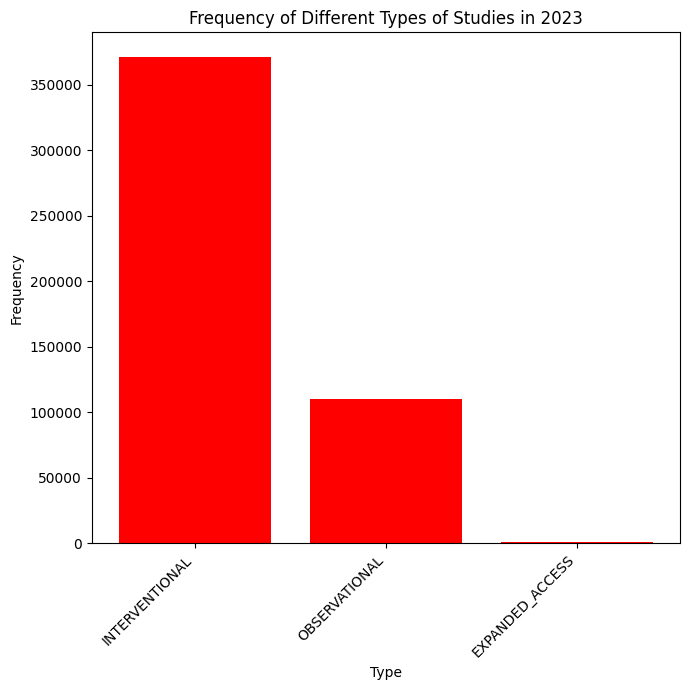

In [0]:
# Extracting type names and frequencies
typ = [y[0] for y in type_counts.collect()]
freq = [y[1] for y in type_counts.collect()]

# Plotting the bar chart
plt.figure(figsize=(7, 7))
plt.bar(typ, freq, color='red')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.title(f'Frequency of Different Types of Studies in {year}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### QUESTION 3
The top 5 conditions (from Conditions) with their frequencies.

In [0]:
# Extracting conditions and mapping them to key-value pairs with initial count 1
top_5_cond = (clinical_trial_RDD
                    .map(lambda a: (a.Conditions, 1))
                    .filter(lambda y: y[0] is not None)
                    .reduceByKey(lambda c, d: c + d)
                    .sortBy(lambda x: x[1], ascending = False)
                    .take(5))

# Printing and collecting the results
for condition, frequency in top_5_cond:
    print(f"Condition: {condition}, Frequency: {frequency}")

Condition: Healthy, Frequency: 7997
Condition: Breast Cancer, Frequency: 4556
Condition: Prostate Cancer, Frequency: 2650
Condition: Asthma, Frequency: 2309
Condition: Obesity, Frequency: 2284


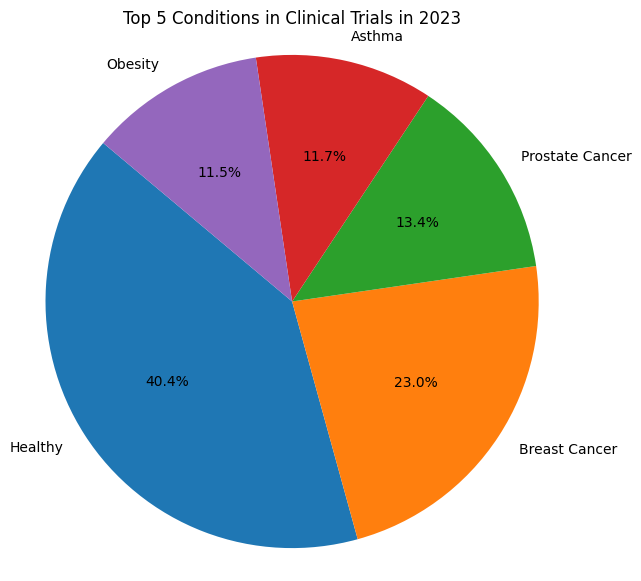

In [0]:
# Extracting condition names and frequencies
cond = [y[0] for y in top_5_cond]
freq = [y[1] for y in top_5_cond]

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(freq, labels = cond, autopct='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title(f'Top 5 Conditions in Clinical Trials in {year}')
plt.show()

#### QUESTION 4
Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that the Parent Company column contains all possible pharmaceutical companies.

In [0]:
# Extracting sponsors and mapping them to key-value pairs with initial count 1
spons_counts = (clinical_trial_RDD
                  .filter(lambda x: x.Sponsor not in pharma_rdd)
                  .map(lambda x: (x.Sponsor, 1))
                  .reduceByKey(lambda c, d: c + d)
                  .sortBy(lambda x: x[1], ascending = False)
                  .take(10))

# Printing the results
for sponsor, count in spons_counts:
    print(f"Sponsor: {sponsor}, count: {count}")

Sponsor: National Cancer Institute (NCI), count: 3410
Sponsor: Assiut University, count: 3335
Sponsor: Cairo University, count: 3023
Sponsor: Assistance Publique - Hôpitaux de Paris, count: 2951
Sponsor: Mayo Clinic, count: 2766
Sponsor: M.D. Anderson Cancer Center, count: 2702
Sponsor: National Institute of Allergy and Infectious Diseases (NIAID), count: 2340
Sponsor: Massachusetts General Hospital, count: 2263
Sponsor: National Taiwan University Hospital, count: 2181
Sponsor: Hoffmann-La Roche, count: 1978


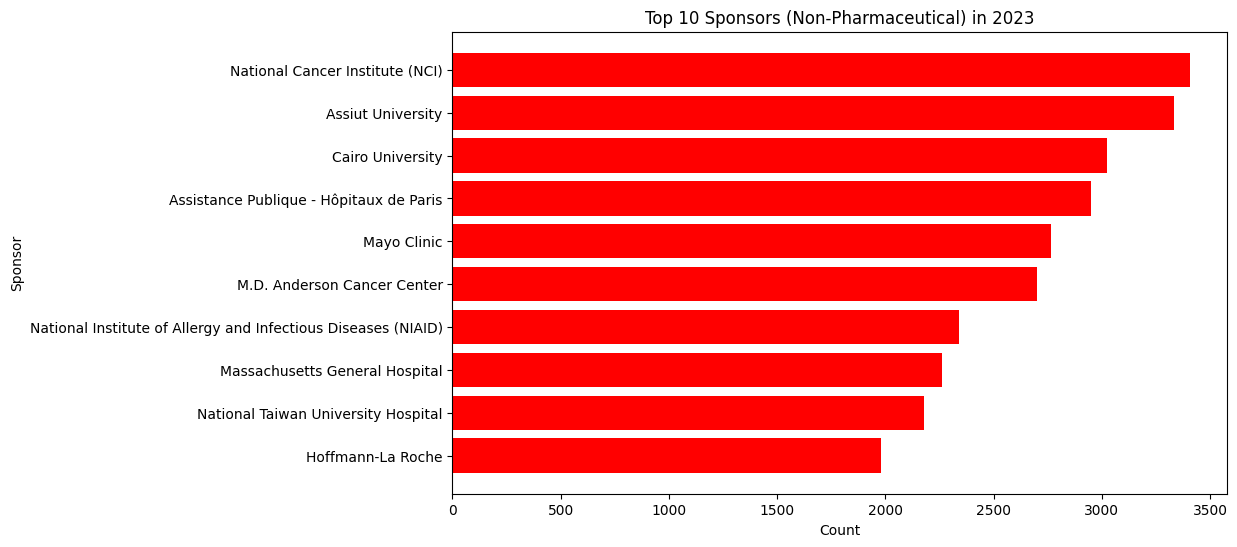

In [0]:
# Extracting sponsor names and counts
spons = [item[0] for item in spons_counts]
count = [item[1] for item in spons_counts]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.barh(spons, count, color='red')
plt.xlabel('Count')
plt.ylabel('Sponsor')
plt.title(f'Top 10 Sponsors (Non-Pharmaceutical) in {year}')
plt.gca().invert_yaxis()
plt.show()

#### QUESTION 5
Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.

In [0]:
def plot_completed_studies(clinical_trial_RDD, year):
    try:
        # Filter completed studies in the extracted year with non-null completion dates
        completed_studies = clinical_trial_RDD.filter(lambda row: row.Status == 'COMPLETED' and row.Completion is not None and row.Completion.startswith(year))

        # Extract month from completion date and map to key-value pairs
        monthly_counts = completed_studies \
            .map(lambda row: (row.Completion.split('-')[1], 1)) \
            .reduceByKey(lambda a, b: a + b) \
            .sortByKey() \
            .collect()

        if not monthly_counts:
            print(f"No completed studies found for the year {year}")
            return None, None

        # Convert month numbers to month names
        month_names = [calendar.month_name[int(month)] for month, _ in monthly_counts]

        # Extracting data for table
        months, counts = zip(*monthly_counts)

        # Plotting the bar chart
        plt.figure(figsize=(11, 8))
        plt.bar(month_names, counts, color='red')
        plt.xlabel('Month')
        plt.ylabel('Number of Completed Studies')
        plt.title(f'Number of Completed Studies for Each Month in {year}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return month_names, counts

    except Exception as e:
        print("")
        return None, None

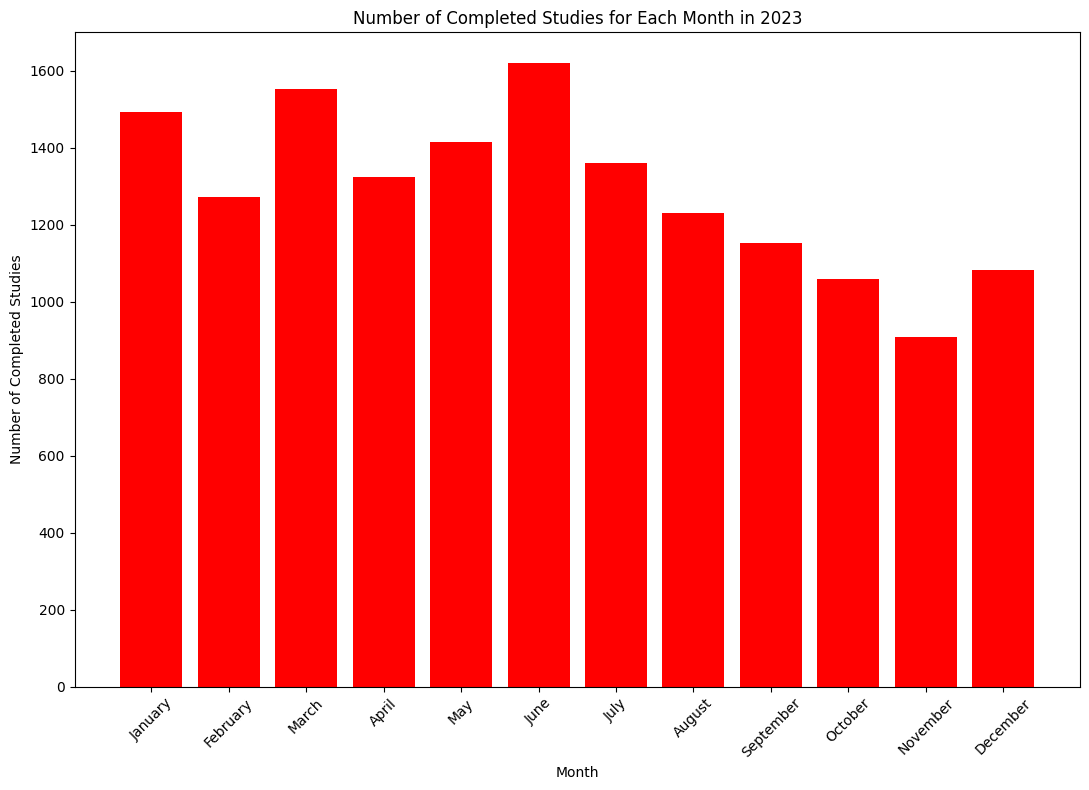

Monthly Counts:
----------------
January: 1494
February: 1272
March: 1552
April: 1324
May: 1415
June: 1619
July: 1360
August: 1230
September: 1152
October: 1058
November: 909
December: 1082


In [0]:
# Call the function
month_names, counts = plot_completed_studies(clinical_trial_RDD, str(year))

# Displaying table with month names
if month_names:
    print("Monthly Counts:")
    print("----------------")
    for month_name, count in zip(month_names, counts):
        print(f"{month_name}: {count}")

#### FURTHER ANALYSIS
Top 5 sponsors whos status is in "Recruiting" stage

In [0]:
# Define a function to filter the RDD based on the status
def filter_stat(row, status):
    return row.Status.lower() == status.lower()

In [0]:
# Filter the RDD to get sponsors still recruiting and count the occurrences
top_5_recruiting_spons = clinical_trial_RDD.filter(lambda row: filter_stat(row, 'RECRUITING')) \
                                               .map(lambda row: (row.Sponsor, 1)) \
                                               .reduceByKey(lambda a, b: a + b) \
                                               .sortBy(lambda x: x[1], ascending=False) \
                                               .take(5)

# Displaying the top 5 sponsors still recruiting
for sponsor, count in top_5_recruiting_spons:
    print(f"{sponsor}: {count}")

M.D. Anderson Cancer Center: 543
Assistance Publique - Hôpitaux de Paris: 497
Mayo Clinic: 483
Cairo University: 361
National Cancer Institute (NCI): 360


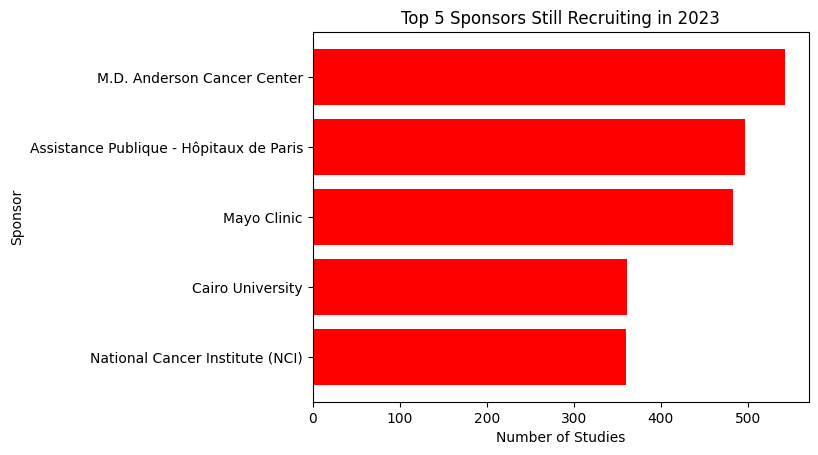

In [0]:
# Extracting sponsor names and counts from the top 5 recruiting sponsors
sponsors, counts = zip(*top_5_recruiting_spons)

# Plotting the bar chart
plt.barh(sponsors, counts, color='red')
plt.xlabel('Number of Studies')
plt.ylabel('Sponsor')
plt.title(f'Top 5 Sponsors Still Recruiting in {year}')
plt.gca().invert_yaxis()
plt.show()